
# Project: Investigate the FBI gun dataset in combination with the Census dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of the project is to investigate the data from the FBI's National Instant Criminal Background Check System. This system is used by gun shop to ensure that the prospective customer does not have a criminal background and is eligible to purchase a firearm. Additional information at the state level is also provided by a dataset from census.gov. 

It is important to note, as stated in the [FBI NICS Firearm Background Check Data](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md), that there is no 1 to 1 correlation between background check and firearm purchase. According to the [NYT analysis](https://github.com/nytimes/gunsales#getting-gun-sales-estimates-from-background-checks) each long gun and hand gun sales should be counted as 1.1 sale and multiple gun check as 2 sales. Moreover a [study from Harvard](https://www.thetrace.org/2015/10/private-sale-loophole-background-check-harvard-research/) found that almost 40% of gun buyers bought their firearm without a background check. For the purpose of the project we will only focus on the number of gun-related background checks instead of trying to estimate which background check led to an actual purchase of firearm.

Questions that will be asked are:

> 1. Which state had the highest number of gun-related background checks in 2010 and 2016? Which state had the lowest?
> 2. How does the number of background checks change overtime?
> 3. How does the number of background checks changes based on different demographic factors?

In [217]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The purpose of this first section of Data Wrangling is to have a general understanding of the data contained in the two databases, and identify how to clean the data to prepare it for further analysis. This section is structured as follows:

1. **Understanding the FBI Dataset**
        a) Type of data present in the database
        b) Dimension of the database
        c) Presence of null values and duplicate rows
        
2. **Understanding the Census Dataset**
        a) Type of data present in the database
        b) Dimension of the database
        c) Presence of null values and duplicate rows

In [218]:
cd C:\\Users\\rmagni\\Desktop\\UDACITY_Programming_for_Data_Science_ND\\Data_Analyst\\Investigate a dataset\\ncis-and-census-data

C:\Users\rmagni\Desktop\UDACITY_Programming_for_Data_Science_ND\Data_Analyst\Investigate a dataset\ncis-and-census-data


In [219]:
# load the FBI and Census databases. 
# While the census data is already in csv format, the FBI data has been converted into csv from xls before the analysis.

df_FBI = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('US_census_data.csv')

In [220]:
# Understanding the general characteristics of the FBI dataset. Look at the first 5 rows.
df_FBI.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [221]:
# Understanding the general characteristics of the FBI dataset. Look at the last 5 rows.
df_FBI.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [222]:
# Display a concise summary of the FBI dataset including the presence of null values.
df_FBI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

> **Note**: I already see the presence of null values that needs to be addressed for futher analysis. I also can observed that all data except for columns 'month' and 'state' is of float type. 

In [223]:
# Display basic statistics of the FBI dataset
df_FBI.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [224]:
# Check for duplicate rows in the FBI dataset
df_FBI.duplicated().sum()

0

> **Note**: No duplicate rows are present in the FBI dataset`

In [225]:
# Understanding the general characteristics of the Census dataset.
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [226]:
df_census.tail()# Display a concise summary of the Census dataset including the presence of null values.

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

> **Note** I see the presence of null values in the dataset. This need to be addressed before analysis. Also I see that the data type is listed as 'object'. I need to understand what kind of data type is to be consistent with the FBI dataset.

In [228]:
#Check what kind of object types are present in the database.
type(df_census['Alabama'][0])

str

> **Note** Since the data type is string and in the other dataset we have floats we will need to change the type to float for consistency.

In [229]:
# Display basic statistics for the Census dataset
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,Median selected monthly owner costs -without a...,(c),0.10%,7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,0.686,0.048,50.40%,2.50%,1.90%,0.10%,"83,313,366",1.50%,0.10%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [230]:
# Check for duplicates in the Census dataset
df_census.duplicated().sum()

3

> **Note**: duplicates in the Census databases need to be addressed before analysis

### Data Cleaning

In this second section of the Data Wrangling part, the issues found in the 'General Properties' section will be addressed in order to clean both dataset so they will be ready for further investigation. 

1. **Clean FBI dataset and Census dataset for further analysis**
        a) Drop columns that are not relevant for the questions we want to answer
        b) Drop null values
        c) Reshape the databases so they can be merged and analyzed together (this can include transposing columns/rows, modifying column labels etc.)

In [231]:
# Drop all duplicates in the Census dataset and confirm that no duplicates remain.
df_census.drop_duplicates(inplace=True)
sum(df_census.duplicated())


0

In [232]:
# Print a list of all columns for the Census dataset. I want to see if the same 'states' are listed in both databases.
for i, column in enumerate(df_census.columns):
    print(i, column)

0 Fact
1 Fact Note
2 Alabama
3 Alaska
4 Arizona
5 Arkansas
6 California
7 Colorado
8 Connecticut
9 Delaware
10 Florida
11 Georgia
12 Hawaii
13 Idaho
14 Illinois
15 Indiana
16 Iowa
17 Kansas
18 Kentucky
19 Louisiana
20 Maine
21 Maryland
22 Massachusetts
23 Michigan
24 Minnesota
25 Mississippi
26 Missouri
27 Montana
28 Nebraska
29 Nevada
30 New Hampshire
31 New Jersey
32 New Mexico
33 New York
34 North Carolina
35 North Dakota
36 Ohio
37 Oklahoma
38 Oregon
39 Pennsylvania
40 Rhode Island
41 South Carolina
42 South Dakota
43 Tennessee
44 Texas
45 Utah
46 Vermont
47 Virginia
48 Washington
49 West Virginia
50 Wisconsin
51 Wyoming


> **Note**: In order to avoid inconsistencies among the state names in the databases I want to format each state name using lower case and replace blank spaces with '_'. 

In [233]:
# Converting columns into lower letters and replace spaces with underscore.
def format_col_names(df):
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
format_col_names(df_census)

In [234]:
# Check the state 
df_census.columns

Index(['fact', 'fact_note', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new_hampshire', 'new_jersey', 'new_mexico',
       'new_york', 'north_carolina', 'north_dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode_island', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

In [235]:
# Each state in the FBI dataset has multiple rows. I will then look for the unique states.
df_FBI.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

> **Note** I can already see that the list of states among the two databases is not identical. I will need to later drop the states that are not in common.

In [236]:
# Convert the state names into lower cases and spaces to underscore for consistency with the Census dataset and check the changes.
df_FBI['state'] = df_FBI['state'].str.lower().replace(" ", "_", regex=True)
df_FBI['state']

0                     alabama
1                      alaska
2                     arizona
3                    arkansas
4                  california
5                    colorado
6                 connecticut
7                    delaware
8        district_of_columbia
9                     florida
10                    georgia
11                       guam
12                     hawaii
13                      idaho
14                   illinois
15                    indiana
16                       iowa
17                     kansas
18                   kentucky
19                  louisiana
20                      maine
21            mariana_islands
22                   maryland
23              massachusetts
24                   michigan
25                  minnesota
26                mississippi
27                   missouri
28                    montana
29                   nebraska
                 ...         
12455               minnesota
12456             mississippi
12457     

>**Note** Since I want to merge the two databases on the state names I need to transpose the Census database so that the each state will be represented as a row instead of a column.

In [237]:
# Transpose the Census dataset
df_census = df_census.T

In [238]:
# Check the changes
df_census.head()

,0,1,2,3,4,5,6,7,8,9,...,74,76,77,78,79,80,81,82,83,84
fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
fact_note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Economic Census - Puerto Rico data are not com...,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
# 'fact note' is not relevant for our analysis so it will be dropped.
df_census.drop('fact_note', axis=0, inplace=True)

In [240]:
# Change the column header 
df_census.columns = df_census.iloc[0]

In [241]:
# Drop all columns with null values
df_census.dropna(axis=1, inplace=True)

>**Note** Now that the states are listed as rows in the Census dataset I want to have a list of states that are not in common between the two datasets.

In [242]:
# Check the list of states in the Census dataset
df_census.index

Index(['fact', 'alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii',
       'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky',
       'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan',
       'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode_island', 'south_carolina', 'south_dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

In [243]:
# Check the list of states in the FBI dataset
df_FBI_unique = df_FBI.state.unique()
df_FBI_unique

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district_of_columbia',
       'florida', 'georgia', 'guam', 'hawaii', 'idaho', 'illinois',
       'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
       'mariana_islands', 'maryland', 'massachusetts', 'michigan',
       'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska',
       'nevada', 'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'puerto_rico', 'rhode_island', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virgin_islands', 'virginia', 'washington', 'west_virginia',
       'wisconsin', 'wyoming'], dtype=object)

In [244]:
# Remove 'fact' from Census dataset
df_census.drop('fact', axis=0, inplace=True)

**Note** Before further modification of the databases I want to have an idea of the gun related background checks through time. 

In [245]:
# I will group the FBI data by months and have the time period and have the total number of checks related to that time period
background_check_overtime = df_FBI.groupby(['month'])['totals'].sum()

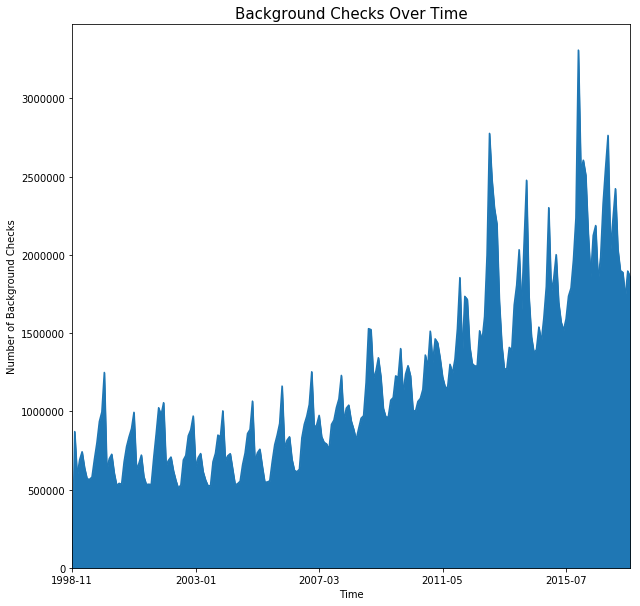

In [246]:
bc_overtime = background_check_overtime.plot.area(figsize=(10,10))
bc_overtime.set_title('Background Checks Over Time', fontsize=15)
bc_overtime.set_xlabel('Time', fontsize=10)
bc_overtime.set_ylabel('Number of Background Checks', fontsize=10);

>**Note** It is clear that the number of gun related background checks increases through the years steeply after 2007.

>**Note** I need to select which ones are the columns that are relevant for the analysis before I merge the databases.

In [247]:
# Print a list of all columns for the Census dataset now that is has been transposed in order to select relevant columns for future analysis.
for i, column in enumerate(df_census.columns):
    print(i, column)

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

>**Note** The most relevant information for this analysis that is contained in the census dataset is the **population estimate**. This data is only available for **2010 and 2016**. So I will need to select the data from the FBI dataset for these two years.

> In the FBI dataset I have data related not only the year but also the month. Since I do not need the month I will sum the data within the year and format the database accordingly in the next subsection.  

In [248]:
# I want to extract only the year because I do not need the month info. 
df_FBI['month'] = df_FBI['month'].apply(lambda x: x.split('-')[0])

In [249]:
# Check changes
df_FBI['month'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: month, dtype: object

In [250]:
# Change the column name to 'year'
df_FBI.rename(columns={'month':'year'}, inplace=True)

>**Note** I want now to find the list of states that are not in common between the two dataset in order to exclude from further analysis

In [251]:
# List all the states present in the FBI dataset
set(df_FBI_unique)

{'alabama',
 'alaska',
 'arizona',
 'arkansas',
 'california',
 'colorado',
 'connecticut',
 'delaware',
 'district_of_columbia',
 'florida',
 'georgia',
 'guam',
 'hawaii',
 'idaho',
 'illinois',
 'indiana',
 'iowa',
 'kansas',
 'kentucky',
 'louisiana',
 'maine',
 'mariana_islands',
 'maryland',
 'massachusetts',
 'michigan',
 'minnesota',
 'mississippi',
 'missouri',
 'montana',
 'nebraska',
 'nevada',
 'new_hampshire',
 'new_jersey',
 'new_mexico',
 'new_york',
 'north_carolina',
 'north_dakota',
 'ohio',
 'oklahoma',
 'oregon',
 'pennsylvania',
 'puerto_rico',
 'rhode_island',
 'south_carolina',
 'south_dakota',
 'tennessee',
 'texas',
 'utah',
 'vermont',
 'virgin_islands',
 'virginia',
 'washington',
 'west_virginia',
 'wisconsin',
 'wyoming'}

In [252]:
# List all the states in the Census dataset
set(df_census.index)

{'alabama',
 'alaska',
 'arizona',
 'arkansas',
 'california',
 'colorado',
 'connecticut',
 'delaware',
 'florida',
 'georgia',
 'hawaii',
 'idaho',
 'illinois',
 'indiana',
 'iowa',
 'kansas',
 'kentucky',
 'louisiana',
 'maine',
 'maryland',
 'massachusetts',
 'michigan',
 'minnesota',
 'mississippi',
 'missouri',
 'montana',
 'nebraska',
 'nevada',
 'new_hampshire',
 'new_jersey',
 'new_mexico',
 'new_york',
 'north_carolina',
 'north_dakota',
 'ohio',
 'oklahoma',
 'oregon',
 'pennsylvania',
 'rhode_island',
 'south_carolina',
 'south_dakota',
 'tennessee',
 'texas',
 'utah',
 'vermont',
 'virginia',
 'washington',
 'west_virginia',
 'wisconsin',
 'wyoming'}

In [253]:
# Identify the states that are present in the FBI dataset but not present in the census dataset.
states_to_drop = list(set(df_FBI_unique)-set(df_census.index))
states_to_drop

['mariana_islands',
 'virgin_islands',
 'district_of_columbia',
 'puerto_rico',
 'guam']

In [254]:
# Double check if there is any state present in the census dataset but not present in the FBI dataset.
list(set(df_census.index)-set(df_FBI_unique))

[]

>**Note** Now that I identified that states that need to be dropped in the census dataset I will create a 'mask' to complete the task

In [255]:
# Delete from the FBI dataset the data for the states not present in the census.
common_states = df_FBI['state'].isin(df_census.index)
common_states

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8        False
9         True
10        True
11       False
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21       False
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
12455     True
12456     True
12457     True
12458     True
12459     True
12460     True
12461     True
12462     True
12463     True
12464     True
12465     True
12466     True
12467     True
12468     True
12469     True
12470     True
12471    False
12472     True
12473     True
12474     True
12475     True
12476     True
12477     True
12478     True
12479    False
12480     True
12481     True
12482     True
12483     True
12484     True
Name: state, Length: 12485, dtype: bool

In [256]:
df_FBI_mask = df_FBI[common_states]

In [257]:
# Check for changes
df_FBI_mask['state'].unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'florida', 'georgia',
       'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new_hampshire', 'new_jersey', 'new_mexico',
       'new_york', 'north_carolina', 'north_dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode_island', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virginia', 'washington', 'west_virginia', 'wisconsin', 'wyoming'],
      dtype=object)

In [258]:
# Create a dataframe containing only FBI data from 2010
df_FBI_2010 = df_FBI_mask.query('year == "2010"')

In [259]:
# Drop all columns with null values for FBI_2010
df_FBI_2010.dropna(axis=1, inplace=True)

C:\Users\rmagni\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [260]:
# Group by state in order to have all data through the year 2010 for each state (previously I eliminated the month)
df_FBI_2010_1 = df_FBI_2010.groupby('state').sum()

In [261]:
# Change name of the columns
def rename_col(df, year):
    df.rename(columns=lambda x: x + year, inplace=True)
    
rename_col(df_FBI_2010_1, year='_2010')

In [262]:
# Check changes
df_FBI_2010_1.head()

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,redemption_long_gun_2010,redemption_other_2010,totals_2010
state,,,,,,,,,,,,,
alabama,4621.0,116963.0,136519.0,1771.0,5465,19.0,115.0,183.0,1.0,19574.0,23341.0,35.0,308607
alaska,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,122.0,1.0,2065.0,2393.0,2.0,65909
arizona,24751.0,89162.0,69067.0,2091.0,3768,0.0,57.0,38.0,0.0,10310.0,6793.0,13.0,206050
arkansas,31305.0,49992.0,72206.0,636.0,3145,64.0,148.0,372.0,2.0,9655.0,23910.0,13.0,191448
california,295252.0,245159.0,275458.0,0.0,0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,816399


In [263]:
# Create a dataframe containing only FBI data from 2016
df_FBI_2016 = df_FBI_mask.query('year == "2016"')

In [264]:
# Drop all columns with null values for FBI 2016
df_FBI_2016.dropna(axis=1, inplace=True)

C:\Users\rmagni\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [265]:
#Group by state in order to have all data through the year 2016 for each state
df_FBI_2016_1 = df_FBI_2016.groupby('state').sum()

In [266]:
# Use the previously created function to rename column in the 2016 database
rename_col(df_FBI_2016_1, year='_2016')

In [267]:
# Check for changes
df_FBI_2016_1.head()

,permit_2016,handgun_2016,long_gun_2016,other_2016,multiple_2016,admin_2016,prepawn_handgun_2016,prepawn_long_gun_2016,prepawn_other_2016,redemption_handgun_2016,...,returned_handgun_2016,returned_long_gun_2016,returned_other_2016,private_sale_handgun_2016,private_sale_long_gun_2016,private_sale_other_2016,return_to_seller_handgun_2016,return_to_seller_long_gun_2016,return_to_seller_other_2016,totals_2016
state,,,,,,,,,,,,,,,,,,,,,
alabama,291039.0,153123.0,121963.0,6104.0,6545,5.0,111.0,114.0,2.0,20036.0,...,0.0,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947
alaska,3121.0,37491.0,36887.0,2889.0,2316,0.0,84.0,70.0,0.0,2234.0,...,233.0,141.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647
arizona,87771.0,166784.0,108988.0,13122.0,7908,0.0,74.0,60.0,3.0,16576.0,...,1116.0,133.0,1.0,76.0,56.0,11.0,11.0,11.0,1.0,416279
arkansas,55456.0,80244.0,82120.0,3059.0,4400,143.0,77.0,116.0,3.0,12645.0,...,0.0,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014
california,1036981.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,6752.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167


>**Note** Now that the databases from 2010 and 2016 have been cleaned I will merge them.

In [268]:
# Merge the FBI dataset for 2010 with 2016
df_FBI_combined = df_FBI_2010_1.merge(df_FBI_2016_1, left_on='state', right_on='state', how='inner')

In [269]:
# Check the columns names to see if the merge happened correctly
df_FBI_combined.columns

Index(['permit_2010', 'handgun_2010', 'long_gun_2010', 'other_2010',
       'multiple_2010', 'admin_2010', 'prepawn_handgun_2010',
       'prepawn_long_gun_2010', 'prepawn_other_2010',
       'redemption_handgun_2010', 'redemption_long_gun_2010',
       'redemption_other_2010', 'totals_2010', 'permit_2016', 'handgun_2016',
       'long_gun_2016', 'other_2016', 'multiple_2016', 'admin_2016',
       'prepawn_handgun_2016', 'prepawn_long_gun_2016', 'prepawn_other_2016',
       'redemption_handgun_2016', 'redemption_long_gun_2016',
       'redemption_other_2016', 'returned_handgun_2016',
       'returned_long_gun_2016', 'returned_other_2016',
       'private_sale_handgun_2016', 'private_sale_long_gun_2016',
       'private_sale_other_2016', 'return_to_seller_handgun_2016',
       'return_to_seller_long_gun_2016', 'return_to_seller_other_2016',
       'totals_2016'],
      dtype='object')

In [270]:
# Confirm that there are no null values
df_FBI_combined.isnull().sum().sum()

0

In [271]:
# Confirm that there are no null values in the Census dataset and visualize the name of the columns.
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 65 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

>**Note** Since I want to merge the Census dataset with the FBI_combined dataset I will only select the column that are going to be relevant for future analysis. I want only to select the data that have information about the total population, which is available for the year 2010 and 2016 as well as demographic differences within the population.

In [272]:
# I will select only the columns that are going to be relevant for my future analysis. 
df_census_sliced = df_census.iloc[:, np.r_[:2, 4:19]]

In [273]:
# Confirm the changes
df_census_sliced.head()

fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)"
alabama,"4,863,300","4,780,131",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%
alaska,"741,894","710,249",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%
arizona,"6,931,071","6,392,301",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%
arkansas,"2,988,248","2,916,025",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%
california,"39,250,017","37,254,522",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%


In [274]:
# Change column labels
# create list with new column labels
new_col_labels = ['population_2016', 'population_2010', 'under_5yo_perc_2016', 'under_5yo_perc_2010', 'under_18yo_perc_2016', 'under_18yo_perc_2010', 'over_65yo_perc_2016', 'over_65yo_perc_2010', 'female_perc_2016', 'female_perc_2010', 'white_perc_2016', 'black_perc_2010', 'american_indian_alsas_native_perc_2016', 'asian_perc_2016', 'hawaiian_islanders_2016', 'multiple_races_2016', 'hispanic_latino_perc_2016']

In [275]:
df_census_sliced.columns = new_col_labels

In [276]:
# change 'fact' label with 'state'.
df_census_sliced.index.rename('state', inplace=True)

In [277]:
# Check changes and see if there are values or symbols that need to be addressed.
df_census_sliced

,population_2016,population_2010,under_5yo_perc_2016,under_5yo_perc_2010,under_18yo_perc_2016,under_18yo_perc_2010,over_65yo_perc_2016,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,
alabama,"4,863,300","4,780,131",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%
alaska,"741,894","710,249",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%
arizona,"6,931,071","6,392,301",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%
arkansas,"2,988,248","2,916,025",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%
california,"39,250,017","37,254,522",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%
colorado,"5,540,545","5,029,324",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,49.70%,49.90%,87.50%,4.50%,1.60%,3.30%,0.20%,3.00%,21.30%
connecticut,"3,576,452","3,574,114",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,51.20%,51.30%,80.60%,11.80%,0.50%,4.70%,0.10%,2.30%,15.70%
delaware,"952,065","897,936",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,51.60%,51.60%,70.10%,22.60%,0.60%,4.00%,0.10%,2.60%,9.20%
florida,"20,612,439","18,804,592",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,51.10%,51.10%,77.60%,16.80%,0.50%,2.90%,0.10%,2.10%,24.90%


**Note** I want to convert all the values to numbers but I see the presence of '%', ',' and 'Z' that need to be addressed.

In [278]:
def clean_values(df):
    for i in df.columns:
        df[i]=df[i].apply(lambda x: x.split('%')[0])
        df[i]=df[i].apply(lambda x: x.replace('Z','0'))
        df[i]=df[i].apply(lambda x: float(str(x.replace(',', '').strip())))

clean_values(df_census_sliced)

C:\Users\rmagni\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rmagni\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rmagni\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [279]:
# Check changes
df_census_sliced.head()

,population_2016,population_2010,under_5yo_perc_2016,under_5yo_perc_2010,under_18yo_perc_2016,under_18yo_perc_2010,over_65yo_perc_2016,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,
alabama,4863300.0,4780131.0,6.0,6.4,22.6,23.7,16.1,13.8,51.6,51.5,69.3,26.8,0.7,1.4,0.1,1.6,4.2
alaska,741894.0,710249.0,7.3,7.6,25.2,26.4,10.4,7.7,47.7,48.0,66.1,3.8,15.2,6.3,1.3,7.3,7.0
arizona,6931071.0,6392301.0,6.3,7.1,23.5,25.5,16.9,13.8,50.3,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9
arkansas,2988248.0,2916025.0,6.4,6.8,23.6,24.4,16.3,14.4,50.9,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3
california,39250017.0,37254522.0,6.3,6.8,23.2,25.0,13.6,11.4,50.3,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9


>**Note** Now that also the Census dataset is clean I will merge it with the FBI_combined

In [280]:
# Merge the FBI_combined dataset with the Census dataset
df_FBI_census = df_FBI_combined.merge(df_census_sliced, left_on='state', right_on='state', how='inner')

In [281]:
# Check if changes were included
df_FBI_census.head()

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,,,,,
alabama,4621.0,116963.0,136519.0,1771.0,5465,19.0,115.0,183.0,1.0,19574.0,...,13.8,51.6,51.5,69.3,26.8,0.7,1.4,0.1,1.6,4.2
alaska,0.0,25720.0,33177.0,825.0,1519,0.0,85.0,122.0,1.0,2065.0,...,7.7,47.7,48.0,66.1,3.8,15.2,6.3,1.3,7.3,7.0
arizona,24751.0,89162.0,69067.0,2091.0,3768,0.0,57.0,38.0,0.0,10310.0,...,13.8,50.3,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9
arkansas,31305.0,49992.0,72206.0,636.0,3145,64.0,148.0,372.0,2.0,9655.0,...,14.4,50.9,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3
california,295252.0,245159.0,275458.0,0.0,0,530.0,0.0,0.0,0.0,0.0,...,11.4,50.3,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
##### Which state had the highest number of gun-related background checks in 2010 and 2016? Which state had the lowest? 

In order to answer this question I will investigate the absolute number of gun related background checks in both 2010 and 2016 as a total number as well as adjusted by population(pro capita)

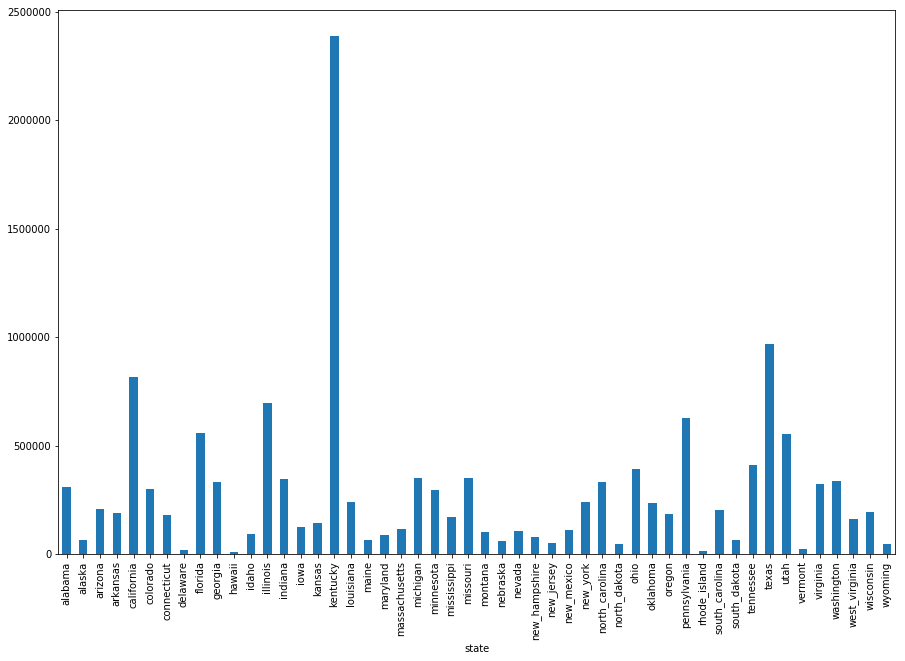

In [282]:
# Visualize the total number of background checks per state in 2010
df_FBI_census['totals_2010'].plot(kind='bar', figsize=(15,10));

In [283]:
# Find the state with the highest number of background checks in 2010
df_FBI_census['totals_2010'].max()

2385579

In [284]:
df_FBI_census[df_FBI_census['totals_2010'] == df_FBI_census['totals_2010'].max()]

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,,,,,
kentucky,2149338.0,84311.0,99910.0,1177.0,5893,66.0,96.0,154.0,2.0,17445.0,...,13.3,50.7,50.8,88.0,8.3,0.3,1.5,0.1,1.9,3.5


In [285]:
# Find the state with the lowest number of background checks in 2010
df_FBI_census['totals_2010'].min()

10533

In [286]:
df_FBI_census[df_FBI_census['totals_2010'] == df_FBI_census['totals_2010'].min()]

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,,,,,
hawaii,10527.0,0.0,0.0,0.0,0,6.0,0.0,0.0,0.0,0.0,...,14.3,49.8,49.9,25.8,2.2,0.4,37.7,10.2,23.7,10.4


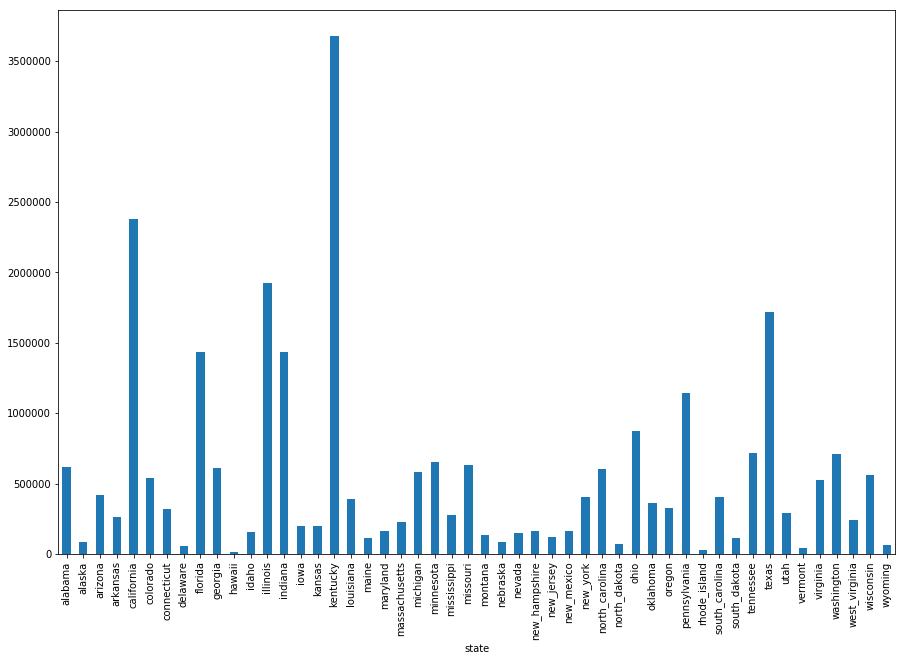

In [287]:
# Visualize the total number of background checks per state in 2016
df_FBI_census['totals_2016'].plot(kind='bar', figsize=(15,10));

In [288]:
# Find the state with the highest number of background checks in 2016
df_FBI_census['totals_2016'].max()

3676847

In [289]:
df_FBI_census[df_FBI_census['totals_2016'] == df_FBI_census['totals_2016'].max()]

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,,,,,
kentucky,2149338.0,84311.0,99910.0,1177.0,5893,66.0,96.0,154.0,2.0,17445.0,...,13.3,50.7,50.8,88.0,8.3,0.3,1.5,0.1,1.9,3.5


In [290]:
# Find the state with the lowest number of background checks in 2016
df_FBI_census['totals_2016'].min()

16681

In [291]:
df_FBI_census[df_FBI_census['totals_2010'] == df_FBI_census['totals_2010'].min()]

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,over_65yo_perc_2010,female_perc_2016,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016
state,,,,,,,,,,,,,,,,,,,,,
hawaii,10527.0,0.0,0.0,0.0,0,6.0,0.0,0.0,0.0,0.0,...,14.3,49.8,49.9,25.8,2.2,0.4,37.7,10.2,23.7,10.4


> **Result** Kentucky has the highest total number of gun related background check for both 2010 and 2016. Hawaii has the lowest total number of background checks for both 2010 and 2016. 

> I will now investigate if that changes once we adjust the data by the state population.

In [292]:
df_FBI_census['background_check_percapita_2010'] = df_FBI_census['totals_2010']/df_FBI_census['population_2010']

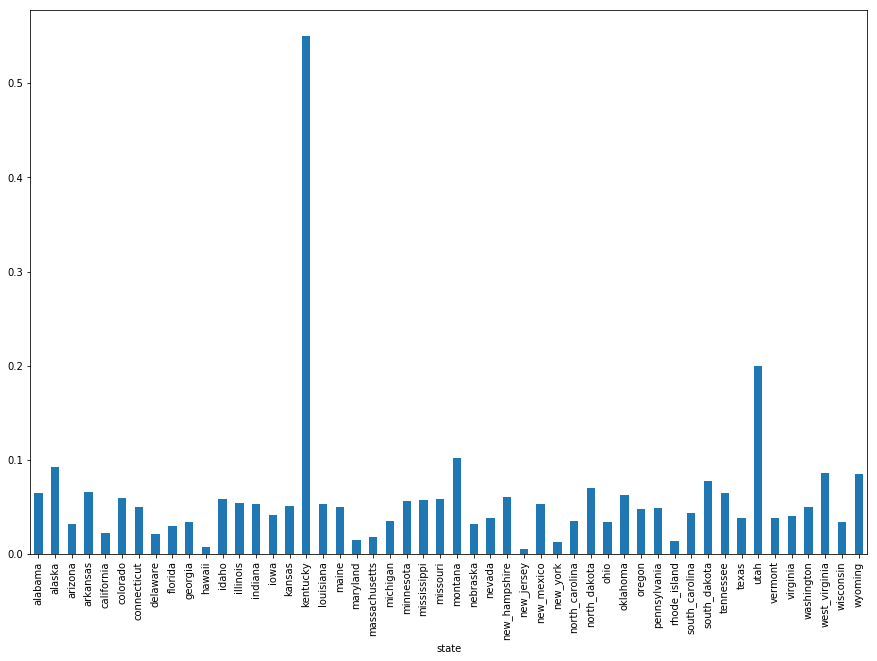

In [293]:
# Visualize the total number of background checks per state in 2010
df_FBI_census['background_check_percapita_2010'].plot(kind='bar', figsize=(15,10));

In [294]:
# Calculate background checks per capita
df_FBI_census['background_check_percapita_2016'] = df_FBI_census['totals_2016']/df_FBI_census['population_2016']

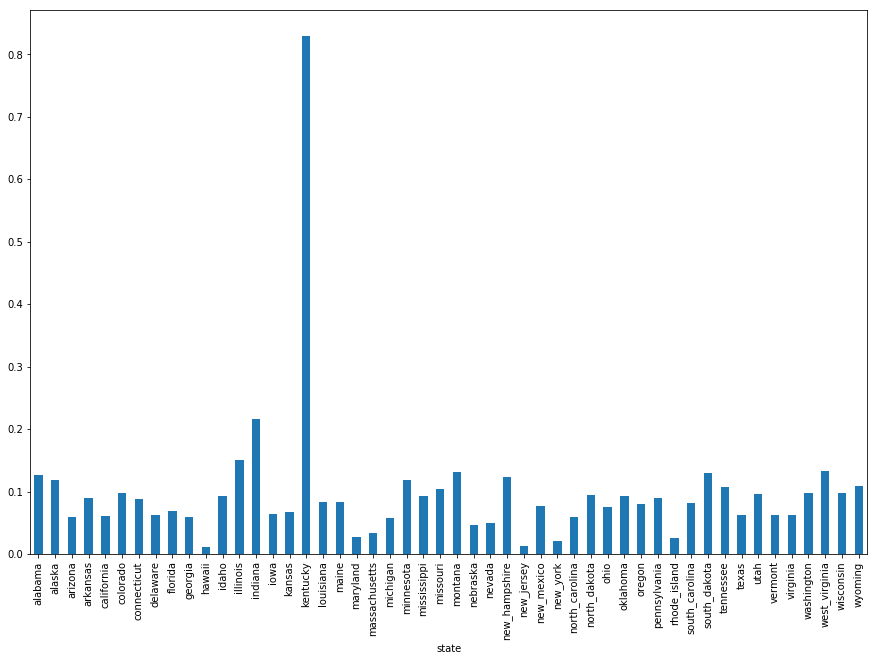

In [295]:
# Visualize the total number of background checks per capita in 2016
df_FBI_census['background_check_percapita_2016'].plot(kind='bar', figsize=(15,10));

> **Note**: While it is evident that Kentucky again has the highest number of background checks per capita in both years 2010 and 2016, the lowest number per capita is not so evident so we need to investigate further.

In [296]:
# Find the state with the lowest number of background checks per capita in 2010
df_FBI_census['background_check_percapita_2010'].min()

0.0057463910464489515

In [297]:
df_FBI_census[df_FBI_census['background_check_percapita_2010'] == df_FBI_census['background_check_percapita_2010'].min()]

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016,background_check_percapita_2010,background_check_percapita_2016
state,,,,,,,,,,,,,,,,,,,,,
new_jersey,0.0,25593.0,24032.0,0.0,888,9.0,0.0,0.0,0.0,0.0,...,51.3,72.4,15.0,0.6,9.8,0.1,2.2,20.0,0.005746,0.013623


In [298]:
# Find the state with the lowest number of background checks per capita in 2016
df_FBI_census['background_check_percapita_2016'].min()

0.011676817935861152

In [299]:
df_FBI_census[df_FBI_census['background_check_percapita_2016'] == df_FBI_census['background_check_percapita_2016'].min()]

,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,prepawn_handgun_2010,prepawn_long_gun_2010,prepawn_other_2010,redemption_handgun_2010,...,female_perc_2010,white_perc_2016,black_perc_2010,american_indian_alsas_native_perc_2016,asian_perc_2016,hawaiian_islanders_2016,multiple_races_2016,hispanic_latino_perc_2016,background_check_percapita_2010,background_check_percapita_2016
state,,,,,,,,,,,,,,,,,,,,,
hawaii,10527.0,0.0,0.0,0.0,0,6.0,0.0,0.0,0.0,0.0,...,49.9,25.8,2.2,0.4,37.7,10.2,23.7,10.4,0.007743,0.011677


**Result** New Jersey has the lowest number of background checks per capita in 2010. Haway has the lowest number of background check per caputa in 2016. Kentucky has the highest number of background checks per capita in both years.

### Answer to Question 1:

While Kentucky has the highest number of background checks in the years 2010 and 2016 both for absolute number and adjusted by census, the dramatic difference compared to the other States raises a red flag. Further investigation reveals that ‘permit’ refers to a firearms-carrying licence issued by the state of Kentucky. **The state checks monthly** whether any of its permit holders may no longer be eligible for gun ownership, e.g. as a result of having committed a felony" [http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf]. 

If we do not consider the inflated data regarding Kentucky we can see from the bar chart that in 2010 Texas had the highest number of absolute background checks and Utah had the highest number per capita. Further research although shows that **"Utah’s permits are checked every 90 days against FBI records**, so again the data needs to be adjusted. In 2016 second to Kentucky, California had the highest number of total background checks while Indiana had the highest number per capita.

Hawaii had the lowest number of total background checks in both 2010 and 2016 and the lowest number of background checks per capita in 2016. In 2010 the lowest number of background checks per capita was in New Jersey. 

As stated in the introduction of the project, number of background checks do not correspond to the number of sales of firearms 1:1. Moreover because each state has its own regulation regarding the frequency of background checks. This analysis is supposed to be exploratory to have a general understanding of gun purchases and distribution. Further research would be required if more precise estimates are needed.

### Research Question 2 
#### How does the number of gun related background checks change overtime?

> To answer this question I will only consider the number of background checks per capita.

In [300]:
# percentage of increase of total background checks per state
df_FBI_census['percentage_checks_change_2010_2016'] = ((df_FBI_census['background_check_percapita_2016'] - df_FBI_census['background_check_percapita_2010'])/df_FBI_census['background_check_percapita_2010'])*100

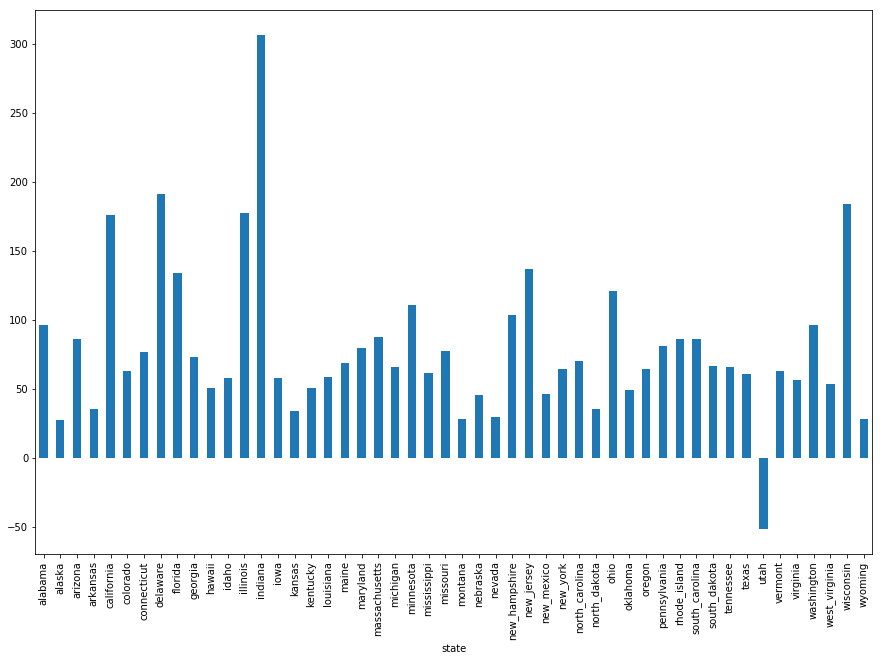

In [301]:
df_FBI_census['percentage_checks_change_2010_2016'].plot(kind='bar', figsize=(15,10));

In [302]:
#convert background check percentage to 'per thousand' persons 
df_FBI_census['background_check_perthousand_2010'] = df_FBI_census['background_check_percapita_2010']*1000
df_FBI_census['background_check_perthousand_2016'] = df_FBI_census['background_check_percapita_2016']*1000

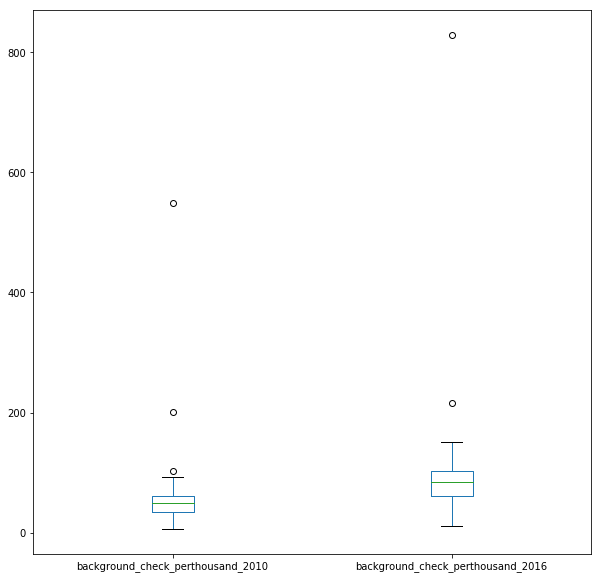

In [303]:
df_FBI_census[['background_check_perthousand_2010', 'background_check_perthousand_2016']].plot(kind='box', figsize=(10,10));

### Answer to Question 2: 
Looking at graph of background check overtime (data wrangling section) and the bar chart and the box plot shown above is evident that there is a dramatic increase in number of background check from 2010 to 2016. In the bar chart is visible that several states have an increase of over 100% of background check. The only one that sees a reduction of background check is Utah. Again conclusion cannot be made regarding the number of gun purchased from this check, since regulation and gun control laws could be one of the reason for the background check increase.

### Research Question 3
#### How does the number of background checks changes based on different demographic factors such as sex, race, etc.?

In [304]:
# Find the correlation coefficients in the merged database
correlations = df_FBI_census.corr()

In [305]:
# Find correlations strongest positive correlation with background checks per capita in 2016. 
#I am interested to see if there is any correlation between the number of background checks different demographic factors.
correlations.background_check_percapita_2010.nlargest(20)

background_check_perthousand_2010    1.000000
background_check_percapita_2010      1.000000
background_check_perthousand_2016    0.941757
background_check_percapita_2016      0.941757
permit_2010                          0.914275
permit_2016                          0.800714
totals_2010                          0.775598
totals_2016                          0.570705
redemption_long_gun_2010             0.241566
returned_other_2016                  0.239648
redemption_long_gun_2016             0.207987
redemption_handgun_2010              0.178328
white_perc_2016                      0.169916
prepawn_other_2016                   0.157016
prepawn_long_gun_2016                0.153493
under_5yo_perc_2010                  0.138294
under_5yo_perc_2016                  0.134682
prepawn_other_2010                   0.131352
under_18yo_perc_2016                 0.129947
under_18yo_perc_2010                 0.121531
Name: background_check_percapita_2010, dtype: float64

In [306]:
# Find correlations strongest positive correlation with background checks per capita in 2016. 
correlations.background_check_percapita_2010.nsmallest(20)

percentage_checks_change_2010_2016   -0.248276
asian_perc_2016                      -0.170146
population_2010                      -0.163423
population_2016                      -0.162549
hispanic_latino_perc_2016            -0.134181
other_2016                           -0.101352
return_to_seller_handgun_2016        -0.100827
return_to_seller_other_2016          -0.095760
private_sale_other_2016              -0.090355
long_gun_2016                        -0.081610
black_perc_2010                      -0.079537
handgun_2016                         -0.075156
hawaiian_islanders_2016              -0.071141
multiple_races_2016                  -0.069541
private_sale_handgun_2016            -0.068689
private_sale_long_gun_2016           -0.059157
admin_2010                           -0.055250
return_to_seller_long_gun_2016       -0.045223
other_2010                           -0.031256
long_gun_2010                        -0.030922
Name: background_check_percapita_2010, dtype: float64

**Result** There seems to be no strong positive or negative correlation of any of the variables related to the type of gun or race with the background checks percapita in 2010.

In [307]:
correlations.background_check_percapita_2016.nlargest(20)

background_check_percapita_2016      1.000000
background_check_perthousand_2016    1.000000
background_check_perthousand_2010    0.941757
background_check_percapita_2010      0.941757
permit_2010                          0.908866
permit_2016                          0.892838
totals_2010                          0.804849
totals_2016                          0.686741
redemption_long_gun_2010             0.257969
redemption_long_gun_2016             0.215844
prepawn_other_2016                   0.193725
redemption_handgun_2010              0.187690
white_perc_2016                      0.168496
prepawn_other_2010                   0.165460
prepawn_long_gun_2016                0.162264
redemption_handgun_2016              0.119050
prepawn_handgun_2016                 0.112122
redemption_other_2010                0.109949
multiple_2010                        0.105344
under_18yo_perc_2016                 0.103506
Name: background_check_percapita_2016, dtype: float64

In [308]:
correlations.background_check_percapita_2010.nsmallest(20)

percentage_checks_change_2010_2016   -0.248276
asian_perc_2016                      -0.170146
population_2010                      -0.163423
population_2016                      -0.162549
hispanic_latino_perc_2016            -0.134181
other_2016                           -0.101352
return_to_seller_handgun_2016        -0.100827
return_to_seller_other_2016          -0.095760
private_sale_other_2016              -0.090355
long_gun_2016                        -0.081610
black_perc_2010                      -0.079537
handgun_2016                         -0.075156
hawaiian_islanders_2016              -0.071141
multiple_races_2016                  -0.069541
private_sale_handgun_2016            -0.068689
private_sale_long_gun_2016           -0.059157
admin_2010                           -0.055250
return_to_seller_long_gun_2016       -0.045223
other_2010                           -0.031256
long_gun_2010                        -0.030922
Name: background_check_percapita_2010, dtype: float64

**Result** Again, no evident strong positive or negative correlation with any variable related to demographic factors emerges

> I want now to investigate a little deeper to see if any correlation exist within the states that have a high number of background checks per capita as well as the ones that have a low number of background checks per capita.

In [309]:
# find the mean of the background checks per capita between 2010 and 2016
mean_2010_2016 = df_FBI_census[['background_check_percapita_2010', 'background_check_percapita_2016']].mean(axis=1)

In [310]:
# create a new column with the mean of the two years
df_FBI_census['mean_2010_2016'] = df_FBI_census[['background_check_percapita_2010', 'background_check_percapita_2016']].mean(axis=1)

In [311]:
# find the median
median_percapita = mean_2010_2016.median()
median_percapita

0.06623818395062525

In [312]:
# find which state have a number of background checks above the mean
high_states = df_FBI_census.query('mean_2010_2016 >= 0.06623818395062525')
high_states.index

Index(['alabama', 'alaska', 'arkansas', 'colorado', 'connecticut', 'idaho',
       'illinois', 'indiana', 'kentucky', 'louisiana', 'maine', 'minnesota',
       'mississippi', 'missouri', 'montana', 'new_hampshire', 'north_dakota',
       'oklahoma', 'pennsylvania', 'south_dakota', 'tennessee', 'utah',
       'washington', 'west_virginia', 'wyoming'],
      dtype='object', name='state')

In [313]:
# find which state have a number of background checks below the mean
low_states = df_FBI_census.query('mean_2010_2016 < 0.06623818395062525')
low_states.index

Index(['arizona', 'california', 'delaware', 'florida', 'georgia', 'hawaii',
       'iowa', 'kansas', 'maryland', 'massachusetts', 'michigan', 'nebraska',
       'nevada', 'new_jersey', 'new_mexico', 'new_york', 'north_carolina',
       'ohio', 'oregon', 'rhode_island', 'south_carolina', 'texas', 'vermont',
       'virginia', 'wisconsin'],
      dtype='object', name='state')

In [314]:
correlations_high = high_states.corr()

In [315]:
correlations_low = low_states.corr()

In [316]:
correlations_high.background_check_percapita_2016

permit_2010                               0.949866
handgun_2010                              0.122676
long_gun_2010                            -0.017581
other_2010                                0.078048
multiple_2010                             0.064686
admin_2010                                0.239260
prepawn_handgun_2010                      0.035720
prepawn_long_gun_2010                     0.023716
prepawn_other_2010                        0.380913
redemption_handgun_2010                   0.382641
redemption_long_gun_2010                  0.370268
redemption_other_2010                     0.352644
totals_2010                               0.915381
permit_2016                               0.960321
handgun_2016                              0.000212
long_gun_2016                             0.058578
other_2016                               -0.052539
multiple_2016                             0.109132
admin_2016                               -0.085226
prepawn_handgun_2016           

In [317]:
correlations_low.background_check_percapita_2016

permit_2010                               0.072672
handgun_2010                              0.314293
long_gun_2010                             0.319256
other_2010                                0.153522
multiple_2010                             0.297346
admin_2010                                0.126491
prepawn_handgun_2010                      0.238429
prepawn_long_gun_2010                     0.287215
prepawn_other_2010                        0.399908
redemption_handgun_2010                   0.201048
redemption_long_gun_2010                  0.216153
redemption_other_2010                     0.172073
totals_2010                               0.297207
permit_2016                               0.229165
handgun_2016                              0.333610
long_gun_2016                             0.278555
other_2016                                0.115656
multiple_2016                             0.233622
admin_2016                                0.157116
prepawn_handgun_2016           

**Note** It looks like the strongest negative correlation in the state with the lowest number of background checks relates to the percentage of asians, hawaiian islanders and multiple races.

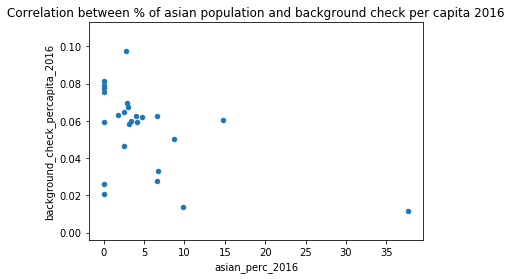

In [318]:
low_states.plot(x='asian_perc_2016', y='background_check_percapita_2016', kind='scatter');
plt.title('Correlation between % of asian population and background check per capita 2016');

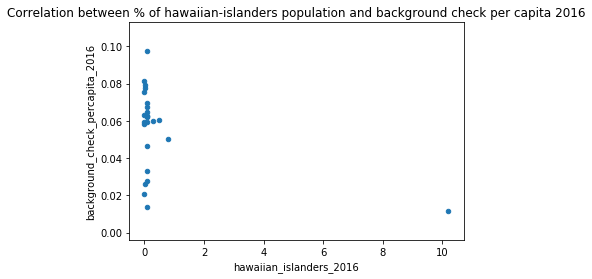

In [319]:
low_states.plot(x='hawaiian_islanders_2016', y='background_check_percapita_2016', kind='scatter');
plt.title('Correlation between % of hawaiian-islanders population and background check per capita 2016');

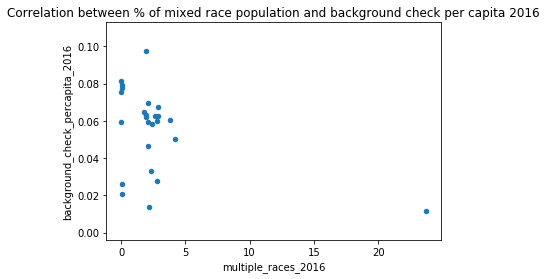

In [320]:
low_states.plot(x='multiple_races_2016', y='background_check_percapita_2016', kind='scatter');
plt.title('Correlation between % of mixed race population and background check per capita 2016');

### Answer to question 3:
Analysis of the merged dataset does not show any strong positive or negative correlation between number of background checks and ethnicity. Looking only in the states that have a low number of background checks, the number of background checks seems to be negative correlated to the percentage of asians, hawaiian islanders and mixed races.
After visualizing the distribution the data seem very scattered and the correlation does not seem evident. Further investigation might be required.

<a id='conclusions'></a>
## Conclusions

The purpose of this project is to investigate the data from the FBI's National Instant Criminal Background Check System alongside with the Census information in order to understand the trends of gun purchases in the US. 
As stated in the beginning when a gun related background check is run it does not necessarily mean that a gun was purchased. The number of gun purchases can be estimated but a lot of other factors need to be considered (i.e. state regulation, number of guns purchased without background check etc.) and this falls outside the scope of this analysis. To be accurate the data presented refer to the number of gun-related background checks, not to the number of gun purchases.

Looking at the number of background checks overtime it is clear that the **number of background checks are increasing**. The reason will need further investigation. Although an increasing number of gun related background check can mean an increase in gun purchases, another hypotesis could be that gun control policies implemented through the years could increase the frequency of background checks to maintain an active permit to individuals who already owned a gun. As we see for example the **state of Kentucky** runs monthly background checks to gun owners and **Utah** runs then background check every three months. This explains why their number of background checks resulting from the analysis is so high. **Hawaii and New Jersey are the states with the lowest number of background checks per capita in the recent years (2010 and 2016)**. 

It is also very interesting to observe an **increase of background checks from 2010 to 2016 for all states except for Utah**. The increase was often above 100%.

In the last part of the analysis a correlation between the number of background checks and demographic factors was investigated. No strong correlation seems to emerge and further investigation might need required.

In [322]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295